# Example of Spam e-mail

In [9]:
import numpy as np
import pandas as pd

# Read the data from file

In [10]:
file = open('smsspamcollection/SMSSpamCollection')

In [11]:
# read line ของข้อมูลในไฟล์
message = [line.rstrip() for line in file]

# Explore data

In [14]:
len(message)

5574

In [15]:
message[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                names=['label','message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
# เพิ่มคอลัมน์ความยาวของข้อความ
df['len'] = df['message'].apply(len)
df

,label,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc023bd3c10>,
      dtype=object)

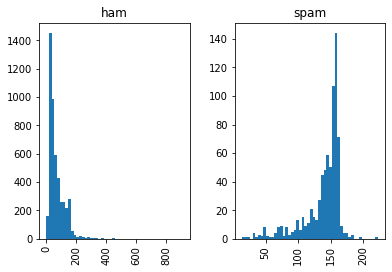

In [23]:
# ดู histogram ของความยาวข้อความ ของทั้ง ham และ spam
df.hist(column='len', by='label', bins=50)

# Remove punctuation

In [24]:
import string

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
test = df['message'][0]
test

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [30]:
no_punc_test = [x for x in test if x not in string.punctuation]
no_punc_test

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [31]:
no_punc_test = ''.join(no_punc_test)
no_punc_test

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

# Remove Stopwords

In [32]:
from nltk.corpus import stopwords

In [34]:
# English stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
# จำนวน English stopwords
len(stopwords.words('english'))

179

In [42]:
# split the sentence
no_punc_test.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [44]:
clean_test = [word for word in no_punc_test.split() if word.lower() not in stopwords.words('english')]
clean_test

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

In [52]:
# define function ที่รวมทั้ง remove punc และ remove stopwords
def text_preprocess(msg):
    # remove punctuation
    no_punc_msg = [x for x in msg if x not in string.punctuation]
    no_punc_msg = ''.join(no_punc_msg)
    # remove stopwords
    clean_msg = [word for word in no_punc_msg.split() if word.lower() not in stopwords.words('english')]
    
    return clean_msg

In [53]:
test = df.head(5)['message']
test

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [54]:
clean_test = test.apply(text_preprocess)
clean_test

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Bag of Words

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
# create the bag of word transformer
bow_transformer = CountVectorizer(analyzer=text_preprocess)

In [57]:
# fit the bag of word transformer
bow_transformer.fit(df['message'])

CountVectorizer(analyzer=<function text_preprocess at 0x7fc0216e9dd0>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# จำนวนคำศัพท์ใน transformer ที่ได้จากการ fit
len(bow_transformer.vocabulary_)

In [79]:
# แสดงคำศัพท์ใน bat-of-words (Note:เป็น dictionary vocab:index)
print(bow_transformer.vocabulary_)

{'Go': 2060, 'jurong': 7555, 'point': 8917, 'crazy': 5769, 'Available': 1110, 'bugis': 5218, 'n': 8336, 'great': 6937, 'world': 11163, 'la': 7668, 'e': 6217, 'buffet': 5217, 'Cine': 1483, 'got': 6906, 'amore': 4653, 'wat': 10965, 'Ok': 3064, 'lar': 7701, 'Joking': 2451, 'wif': 11072, 'u': 10698, 'oni': 8590, 'Free': 1941, 'entry': 6331, '2': 423, 'wkly': 11123, 'comp': 5619, 'win': 11084, 'FA': 1833, 'Cup': 1551, 'final': 6557, 'tkts': 10512, '21st': 443, 'May': 2804, '2005': 430, 'Text': 3953, '87121': 871, 'receive': 9252, 'questionstd': 9159, 'txt': 10686, 'rateTCs': 9200, 'apply': 4731, '08452810075over18s': 73, 'U': 4068, 'dun': 6204, 'say': 9554, 'early': 6222, 'hor': 7186, 'c': 5261, 'already': 4629, 'Nah': 2948, 'dont': 6123, 'think': 10433, 'goes': 6877, 'usf': 10799, 'lives': 7842, 'around': 4777, 'though': 10450, 'FreeMsg': 1943, 'Hey': 2222, 'darling': 5864, '3': 543, 'weeks': 11011, 'word': 11150, 'back': 4893, 'Id': 2346, 'like': 7800, 'fun': 6755, 'still': 10093, 'Tb': 3

In [62]:
# ลอง transform 1 sample (list)
test = [df['message'][0]]
test

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [64]:
bow_test = bow_transformer.transform(test)
bow_test

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [65]:
# ดู element ของ sparse matrix ที่ไม่เป็น 0
print(bow_test)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1


In [70]:
# ดูว่าแต่ละ element ตรงกับคำว่าอะไร
bow_transformer.get_feature_names()[1110]

'Available'

In [71]:
# Transform ทั้ง dataset
bow_msg = bow_transformer.transform(df['message'])
bow_msg

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [73]:
# จำนวน element ใน matrix ที่ไม่เป็น 0
bow_msg.nnz

50548

# TF-IDF  
แปลงจาก bag of words ที่มี element เป็น integer  
เป็น TF-IDF ที่มี element เป็น float และเป็นค่าที่ถูก weight ด้วยระดับความสำคัญของคำนั้นๆ จาก documents ทั้งหมดที่มีใน corpus (idf)

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

In [75]:
# define the transformer
tfidf_transformer = TfidfTransformer()
# fit the transformer on bag-of-words of data
tfidf_transformer.fit(bow_msg)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [76]:
# ลอง transform ตัวอย่าง 1 sample
bow_test

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [77]:
tfidf_test = tfidf_transformer.transform(bow_test)
tfidf_test

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [78]:
print(tfidf_test)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418


In [80]:
# อยากทราบ idf ของคำศัพท์ เช่นคำว่า 'time'
# Note : idf คือความสำคัญของคำนั้นๆ ต่อเอกสารทั้งหมดใน corpus

# หา index ของคำศัพท์จาก bag-of-words transformer ก่อน
bow_transformer.vocabulary_['time']

10487

In [82]:
# หา idf จาก tfidf_transformer
tfidf_transformer.idf_[10487]

4.410753029960551

In [83]:
# transform ทั้งหมดของ data
tfidf_msg = tfidf_transformer.transform(bow_msg)
tfidf_msg

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

# Classifier

In [88]:
# X and y
X = tfidf_msg
y = df['label']

In [91]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4457, 11425)
(4457,)
(1115, 11425)
(1115,)


In [87]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [92]:
# define classifier
spam_clf = MultinomialNB()
# fit the classifier
spam_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
# make prediction on test set
y_pred = spam_clf.predict(X_test)

In [95]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [94]:
# Evaluation metrics
from sklearn import metrics

In [96]:
# confusion metrix
metrics.confusion_matrix(y_test, y_pred)

array([[972,   0],
       [ 50,  93]])

In [97]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.9551569506726457

In [99]:
# F1 score (label = 1 is spam)
metrics.f1_score(y_test, y_pred, pos_label='spam')

0.7881355932203389

In [101]:
# precision score
metrics.precision_score(y_test, y_pred, pos_label='spam')

1.0

In [102]:
# recall score
metrics.recall_score(y_test, y_pred, pos_label='spam')

0.6503496503496503

# Pipeline

In [113]:
# ต้องทำ train-test split จาก ข้อมูลเดิม
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [103]:
from sklearn.pipeline import Pipeline

In [104]:
steps = [
    ('bow', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
]

In [109]:
pipe = Pipeline(steps)

In [114]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x7fc0216e9dd0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [115]:
y_pred = pipe.predict(X_test)

In [116]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [117]:
# confusion metrix
metrics.confusion_matrix(y_test, y_pred)

array([[972,   0],
       [ 50,  93]])

In [118]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.9551569506726457

In [119]:
# F1 score (label = 1 is spam)
metrics.f1_score(y_test, y_pred, pos_label='spam')

0.7881355932203389

In [120]:
# precision score
metrics.precision_score(y_test, y_pred, pos_label='spam')

1.0

In [121]:
# recall score
metrics.recall_score(y_test, y_pred, pos_label='spam')

0.6503496503496503

# จัดเป็น dataframe ให้ดูง่ายๆ

In [126]:
df_test = pd.DataFrame(data=X_test)
df_test

,message
4635,These won't do. Have to move on to morphine
2279,Hmm...Bad news...Hype park plaza $700 studio t...
4545,when you and derek done with class?
5084,Hey happy birthday...
5298,I.ll hand her my phone to chat wit u
...,...
2357,No..he joined today itself.
1174,Ü dun need to pick ur gf?
192,I'm sorry. I've joined the league of people th...
3606,Jordan got voted out last nite!


In [128]:
df_test['label']=y_test
df_test['prediction']=y_pred

In [130]:
df_test.sample(10)

,message,label,prediction
1704,Just taste fish curry :-P,ham,ham
3040,"Wishing you and your family Merry ""X"" mas and ...",ham,ham
692,Sorry to trouble u again. Can buy 4d for my da...,ham,ham
4583,Wow didn't think it was that common. I take it...,ham,ham
4709,"Did you say bold, then torch later. Or one tor...",ham,ham
3314,"Huh... Hyde park not in mel ah, opps, got conf...",ham,ham
4989,Which channel:-):-):):-).,ham,ham
1803,Ok lor thanx... Ü in school?,ham,ham
3200,No de.am seeing in online shop so that i asked.,ham,ham
4197,"Sorry, it's a lot of friend-of-a-friend stuff,...",ham,ham


In [131]:
with pd.option_context('display.max_rows', None):
    display(df_test)

,message,label,prediction
4635,These won't do. Have to move on to morphine,ham,ham
2279,Hmm...Bad news...Hype park plaza $700 studio t...,ham,ham
4545,when you and derek done with class?,ham,ham
5084,Hey happy birthday...,ham,ham
5298,I.ll hand her my phone to chat wit u,ham,ham
1217,You have 1 new voicemail. Please call 08719181...,spam,ham
3222,"Thanks for your ringtone order, reference numb...",spam,spam
3172,Still otside le..u come 2morrow maga..,ham,ham
4513,Now project pa. After that only i can come.,ham,ham
5476,Yes princess! I want to please you every night...,ham,ham
